# Using vader lexicon for sentiment analysis

# 1)- Importing key modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

# for preprocessing
import pandas as pd
import numpy as np
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords
nltk.download('stopwords')
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hassansherwani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2)-Loading Data


witter Sentiment Data: https://www.kaggle.com/kazanova/sentiment140/data#

In [3]:
df = pd.read_csv('twitter4000.csv')
df.head()

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0


In [4]:
df.shape

(4000, 2)

In [5]:
df.sentiment.value_counts()

1    2000
0    2000
Name: sentiment, dtype: int64

**1 being positive , 0 being negative**

# 3)- Word Cloud

In [6]:
from wordcloud import WordCloud, STOPWORDS

In [7]:
stopwords=set(STOPWORDS)

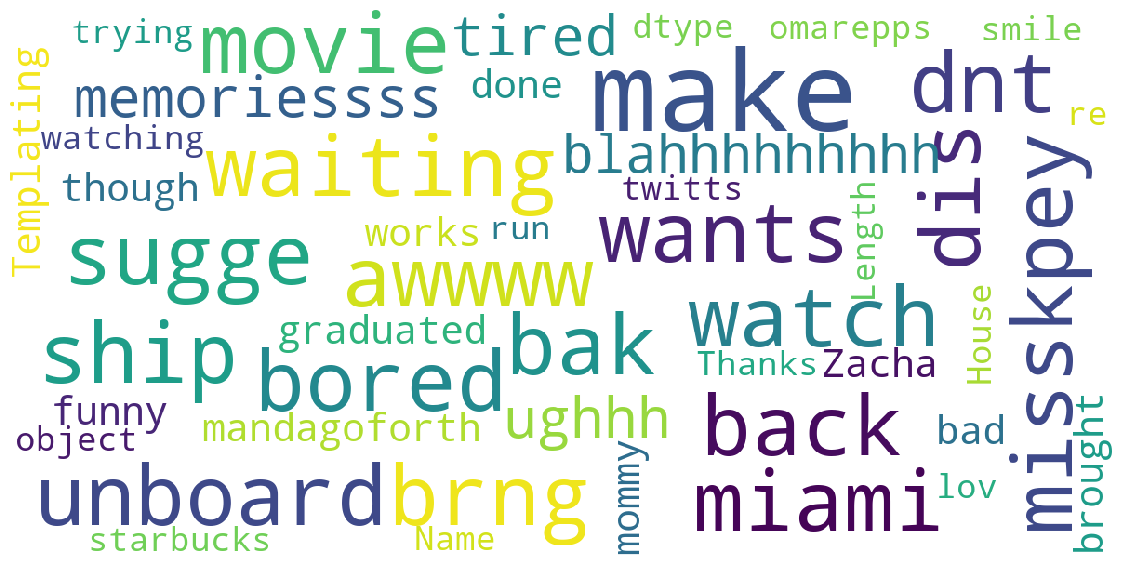

In [8]:
def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()

Mywordcloud(df["twitts"].dropna())

# 4)- Clean data

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hassansherwani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;#]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z +_]')
STOPWORDS = stopwords.words('english')
STOPWORDS.extend(['rt', 'http']) # extend stopwords; rt means re-tweet
STOPWORDS = set(STOPWORDS)

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS]) # delete stopwords from text
    text = text.strip()
    return text

In [11]:
df['cleaned']=[text_prepare(x) for x in df['twitts']]

In [12]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

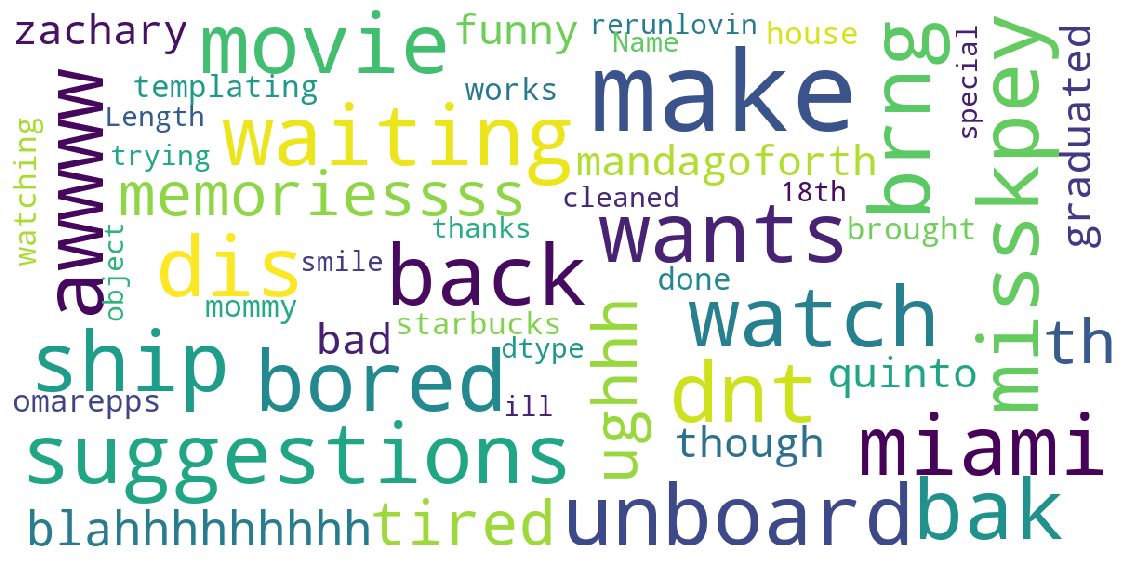

In [13]:
def Cleanwordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Cleanwordcloud(df["cleaned"].dropna())

# 5)-Sentiments extraction 

We shall use original twitts variable

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hassansherwani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sid= SentimentIntensityAnalyzer()

In [16]:
df.head(2)

,twitts,sentiment,cleaned
0,is bored and wants to watch a movie any sugge...,0,bored wants watch movie suggestions
1,back in miami. waiting to unboard ship,0,back miami waiting unboard ship


In [17]:
df['Sent_compound_Polarity'] = df.twitts.apply(lambda x:sid.polarity_scores(x)['compound'])
df['neutral']= df.twitts.apply(lambda x:sid.polarity_scores(x)['neu'])
df['negative']= df.twitts.apply (lambda x:sid.polarity_scores(x)['neg'])
df['positive']= df.twitts.apply(lambda x:sid.polarity_scores(x)['pos'])
df['Sent_type']=''

In [18]:
df.head(2)

,twitts,sentiment,cleaned,Sent_compound_Polarity,neutral,negative,positive,Sent_type
0,is bored and wants to watch a movie any sugge...,0,bored wants watch movie suggestions,-0.2732,0.792,0.208,0.0,
1,back in miami. waiting to unboard ship,0,back miami waiting unboard ship,0.0000,1.000,0.000,0.0,


In [19]:
df.loc[df.Sent_compound_Polarity > 0, 'Sent_type']= 'Positive'

df.loc[df.Sent_compound_Polarity == 0, 'Sent_type']= 'Neutral'

df.loc[df.Sent_compound_Polarity < 0, 'Sent_type']= 'Negative'

In [20]:
df.head()

,twitts,sentiment,cleaned,Sent_compound_Polarity,neutral,negative,positive,Sent_type
0,is bored and wants to watch a movie any sugge...,0,bored wants watch movie suggestions,-0.2732,0.792,0.208,0.000,Negative
1,back in miami. waiting to unboard ship,0,back miami waiting unboard ship,0.0000,1.000,0.000,0.000,Neutral
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,misskpey awwww dnt dis brng bak memoriessss th...,-0.0772,0.604,0.208,0.188,Negative
3,ughhh i am so tired blahhhhhhhhh,0,ughhh tired blahhhhhhhhh,-0.5777,0.517,0.483,0.000,Negative
4,@mandagoforth me bad! It's funny though. Zacha...,0,mandagoforth bad funny though zachary quinto t...,-0.2924,0.759,0.141,0.100,Negative


In [21]:
tweets_sentiment=df.Sent_type.value_counts()
tweets_sentiment

Positive    1884
Neutral     1080
Negative    1036
Name: Sent_type, dtype: int64

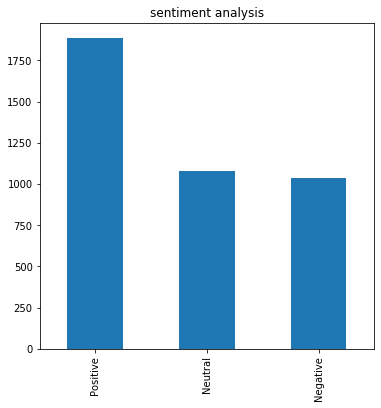

In [22]:
df.Sent_type.value_counts().plot (kind='bar' , title="sentiment analysis")

### mapping in numeric form

In [23]:
df['labels'] = df.Sent_type.map({'Negative':0, 'Positive':1, 'Neutral':2})

# 6)-Vader vs Original instances

In [24]:
df.head()

,twitts,sentiment,cleaned,Sent_compound_Polarity,neutral,negative,positive,Sent_type,labels
0,is bored and wants to watch a movie any sugge...,0,bored wants watch movie suggestions,-0.2732,0.792,0.208,0.000,Negative,0
1,back in miami. waiting to unboard ship,0,back miami waiting unboard ship,0.0000,1.000,0.000,0.000,Neutral,2
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,misskpey awwww dnt dis brng bak memoriessss th...,-0.0772,0.604,0.208,0.188,Negative,0
3,ughhh i am so tired blahhhhhhhhh,0,ughhh tired blahhhhhhhhh,-0.5777,0.517,0.483,0.000,Negative,0
4,@mandagoforth me bad! It's funny though. Zacha...,0,mandagoforth bad funny though zachary quinto t...,-0.2924,0.759,0.141,0.100,Negative,0


In [25]:
df.tail()

,twitts,sentiment,cleaned,Sent_compound_Polarity,neutral,negative,positive,Sent_type,labels
3995,i just graduated,1,graduated,0.0000,1.000,0.0,0.000,Neutral,2
3996,Templating works; it all has to be done,1,templating works done,0.0000,1.000,0.0,0.000,Neutral,2
3997,mommy just brought me starbucks,1,mommy brought starbucks,0.0000,1.000,0.0,0.000,Neutral,2
3998,@omarepps watching you on a House re-run...lov...,1,omarepps watching house rerunlovin,0.0000,1.000,0.0,0.000,Neutral,2
3999,Thanks for trying to make me smile I'll make y...,1,thanks trying make smile ill make 18th special...,0.8832,0.493,0.0,0.507,Positive,1


In [26]:
df['sentiment'].value_counts()

1    2000
0    2000
Name: sentiment, dtype: int64

In [27]:
df.labels.value_counts()

1    1884
2    1080
0    1036
Name: labels, dtype: int64

In [28]:
df['sentiment'].equals(df['labels'])

False

In [29]:
df['SentimentMatch'] = np.where(df['sentiment'] == df['labels'], 'True', 'False')

In [30]:
df.head()

,twitts,sentiment,cleaned,Sent_compound_Polarity,neutral,negative,positive,Sent_type,labels,SentimentMatch
0,is bored and wants to watch a movie any sugge...,0,bored wants watch movie suggestions,-0.2732,0.792,0.208,0.000,Negative,0,True
1,back in miami. waiting to unboard ship,0,back miami waiting unboard ship,0.0000,1.000,0.000,0.000,Neutral,2,False
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,misskpey awwww dnt dis brng bak memoriessss th...,-0.0772,0.604,0.208,0.188,Negative,0,True
3,ughhh i am so tired blahhhhhhhhh,0,ughhh tired blahhhhhhhhh,-0.5777,0.517,0.483,0.000,Negative,0,True
4,@mandagoforth me bad! It's funny though. Zacha...,0,mandagoforth bad funny though zachary quinto t...,-0.2924,0.759,0.141,0.100,Negative,0,True


In [31]:
df.SentimentMatch.value_counts()

True     2077
False    1923
Name: SentimentMatch, dtype: int64

### a.Points where Positive values match

In [32]:
df_orginal=df[['twitts','sentiment']]
df_vader=df[['twitts','labels']]

In [33]:
print(df_orginal.shape)
print(df_vader.shape)

(4000, 2)
(4000, 2)


In [34]:
 
len(df_orginal[df_orginal.sentiment==1])

2000

In [35]:
len(df_vader[df_vader.labels==1])

1884

**We have difference of 116 values between the two.**

In [36]:
# make a df for only positive sentiments
df_orginal_pos=df_orginal[df_orginal.sentiment==1]
df_vader_pos=df_vader[df_vader.labels==1]

In [37]:
print(df_orginal_pos.shape)
print(df_vader_pos.shape)

(2000, 2)
(1884, 2)


### b.Points where negative values match

In [38]:
 len(df_orginal[df_orginal.sentiment==0])

2000

In [39]:
 len(df_vader[df_vader.labels==0])

1036

### c.Checking positive in vader vs positive in original

In [40]:
df[(df.sentiment==1) & (df.labels==1)]

,twitts,sentiment,cleaned,Sent_compound_Polarity,neutral,negative,positive,Sent_type,labels,SentimentMatch
2000,@roninofragnarok You can use the # to specify ...,1,roninofragnarok use specify keyword like ninte...,0.7170,0.740,0.0,0.260,Positive,1,True
2002,not a lonely day after all.,1,lonely day,0.2755,0.655,0.0,0.345,Positive,1,True
2004,"@Akihikio Indeed, it's very convenient. Take ...",1,akihikio indeed convenient take pictures tweet...,0.4767,0.709,0.0,0.291,Positive,1,True
2005,"didnt get to see up, but was pretty satisfied ...",1,didnt get see pretty satisfied variety tagalog...,0.8402,0.652,0.0,0.348,Positive,1,True
2007,@MZ_KISS LOL wassup mamasz,1,mz_kiss lol wassup mamasz,0.5473,0.459,0.0,0.541,Positive,1,True
...,...,...,...,...,...,...,...,...,...,...
3990,@LittleFletcher sounds great!!!! I hope you lo...,1,littlefletcher sounds great hope look beautifu...,0.8767,0.436,0.0,0.564,Positive,1,True
3992,Conan on The Tonight Show was good,1,conan tonight show good,0.4404,0.674,0.0,0.326,Positive,1,True
3993,"@imstardust heyhey darling, would you be free ...",1,imstardust heyhey darling would free meet coli...,0.7964,0.705,0.0,0.295,Positive,1,True
3994,@saravananr @HeyCameron @thejetset thanks for ...,1,saravananr heycameron thejetset thanks kind wo...,0.8625,0.455,0.0,0.545,Positive,1,True


- All those instances where Vader lexicon came up with positive values and original data agreed with that.

- We can see that there is difference in what we had when we only used Vader. We had 1884 positive values.

- Here we got all matched instances between original and Vader.

### d.Checking negative in vader vs nagative in original

In [41]:
df[(df.sentiment==0) & (df.labels==0)]

,twitts,sentiment,cleaned,Sent_compound_Polarity,neutral,negative,positive,Sent_type,labels,SentimentMatch
0,is bored and wants to watch a movie any sugge...,0,bored wants watch movie suggestions,-0.2732,0.792,0.208,0.000,Negative,0,True
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,misskpey awwww dnt dis brng bak memoriessss th...,-0.0772,0.604,0.208,0.188,Negative,0,True
3,ughhh i am so tired blahhhhhhhhh,0,ughhh tired blahhhhhhhhh,-0.5777,0.517,0.483,0.000,Negative,0,True
4,@mandagoforth me bad! It's funny though. Zacha...,0,mandagoforth bad funny though zachary quinto t...,-0.2924,0.759,0.141,0.100,Negative,0,True
5,"brr, i'm so cold. at the moment doing my assig...",0,brr im cold moment assignment huntingtons dise...,-0.4391,0.847,0.153,0.000,Negative,0,True
...,...,...,...,...,...,...,...,...,...,...
1986,"@CasualLavish Oh no, who closed? I bought a t...",0,casuallavish oh closed bought ton nancy drew b...,-0.3595,0.872,0.128,0.000,Negative,0,True
1991,@cherrywopie korean dramas? arent you in japan...,0,cherrywopie korean dramas arent japan ahaha bu...,-0.7393,0.762,0.238,0.000,Negative,0,True
1992,My sunburns hurt to much to even sleep on my s...,0,sunburns hurt much even sleep side stomach,-0.5267,0.746,0.254,0.000,Negative,0,True
1996,@ babiiluv23 I miss you 2 fend! I told u 2 come,0,babiiluv23 miss 2 fend told u 2 come,-0.2244,0.725,0.275,0.000,Negative,0,True


- we had 1036 negative instances created by Vader and we can see that original data agreed on 844 instances.
- Another proof that we are doing right is to see "SentimentMatch" being True for all zero instances.
- We can add 844+1233= 2077

In [42]:
df.SentimentMatch.value_counts()

True     2077
False    1923
Name: SentimentMatch, dtype: int64

Hence, we can see we got correct number.